# Audio Noise Separation

Proposed Algorithm :
1. Load Audio
2. Convert it from time domain data to frequency domain data using FFT(Fast Fourier Transformation)
3. Perform Calculations(Separate noise from audio)
4. Apply Inverse Fourier Transformation on extracted audios
5. Export Audios

In [410]:
import librosa
from librosa import display
from IPython.display import Audio
import matplotlib.pyplot as plt
import scipy
import numpy as np
import soundfile as sf
from scipy.ndimage import gaussian_filter

## Step 1 : Load Audio

In [411]:
# loading audio
def load_audio(filepath):
    samples, sampling_rate = librosa.load(filepath, sr = None, mono = True, offset = 0.0, duration = None)
    return samples, sampling_rate
    
file_path = "audio/n16new.wav"
samples, sampling_rate = load_audio(file_path)
len(samples), sampling_rate

(160000, 16000)

In [412]:
# duration
duration_of_sound = len(samples) / sampling_rate
print("Duration of audio :", duration_of_sound, "seconds")

Duration of audio : 10.0 seconds


In [413]:
Audio(file_path)

### Time domain representation

In [414]:
def plot_waveshow_td_representation(audio, sampling_rate):
    plt.figure(figsize=(15,7))
    display.waveshow(y = audio, sr = sampling_rate)
    plt.xlabel("Time (in seconds)")
    plt.ylabel("Amplitude")
    return plt.show()

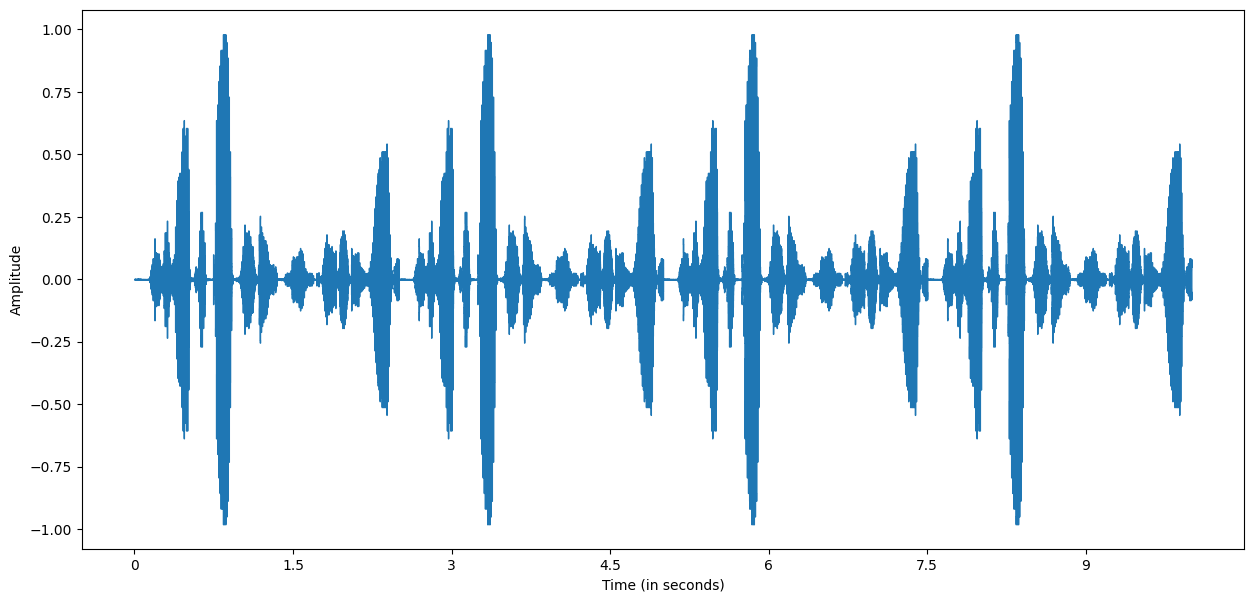

In [415]:
plot_waveshow_td_representation(samples, sampling_rate)

## Step 2 : Apply Fourier Transform

### Spectrogram

In [416]:
specgram_data_final = librosa.stft(samples, n_fft=4096, hop_length=128)
print('Original spectrogram size is:', specgram_data_final.shape, '\n')

Original spectrogram size is: (2049, 1251) 



In [417]:
def plot_spectrogram(spectrogram_data):
    plt.figure(1).set_size_inches(12, 8)
    plt.figure(1).subplots_adjust(left=0.05, bottom=0.1,
                                right=0.95, top=0.9, wspace=0.6, hspace=0.8)
    plt.pcolormesh(librosa.amplitude_to_db(spectrogram_data), cmap='magma')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Samples')
    return plt.show()

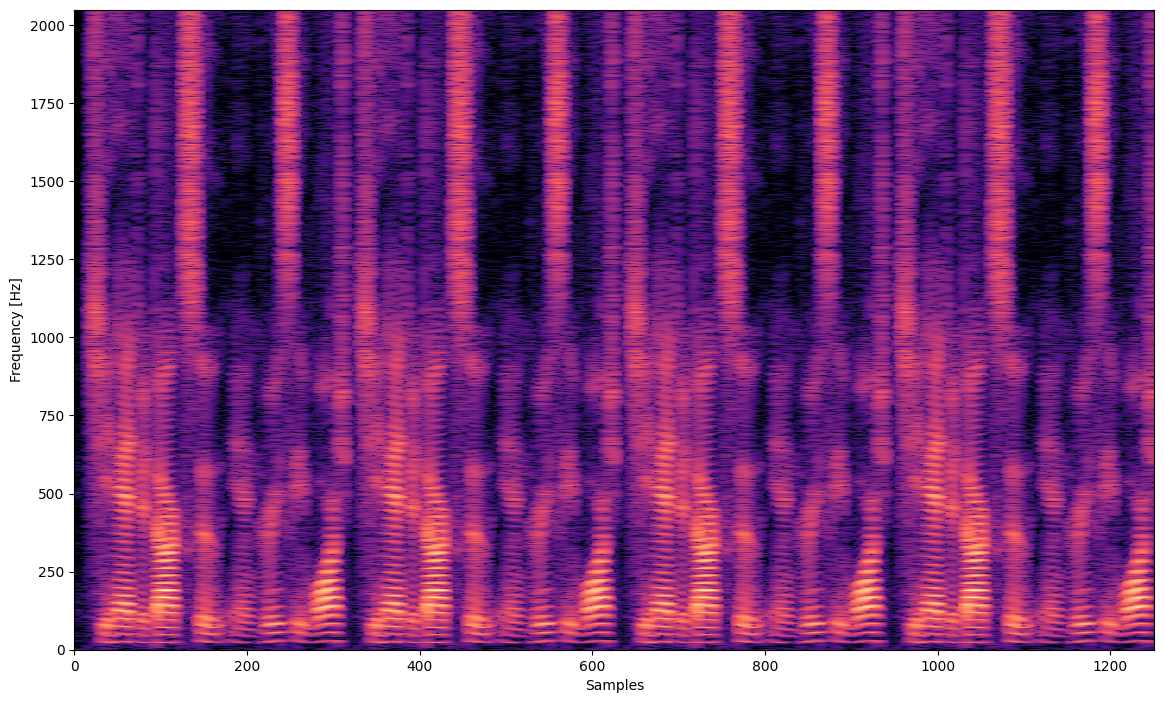

In [418]:
plot_spectrogram(specgram_data_final)

In [419]:
specgram_data_final

array([[ 1.24291636e-01+0.j        ,  1.34045571e-01+0.j        ,
         1.42588452e-01+0.j        , ..., -6.15415610e-02+0.j        ,
        -5.49606159e-02+0.j        , -4.79205176e-02+0.j        ],
       [-8.15634578e-02+0.0710343j , -9.79057252e-02+0.06111865j,
        -1.10734299e-01+0.04716188j, ...,  3.60260159e-02+0.03001729j,
         3.04634180e-02+0.03168989j,  2.48849280e-02+0.03246354j],
       [ 1.97584070e-02-0.06989393j,  4.25007418e-02-0.06132733j,
         6.12137876e-02-0.04448895j, ..., -2.50916574e-02-0.00252765j,
        -2.52391100e-02-0.01600396j, -1.76055655e-02-0.02819197j],
       ...,
       [-1.01880031e-02+0.00450698j, -7.73702469e-03+0.00916209j,
        -3.10261385e-03+0.01221107j, ...,  3.04260761e-01-0.06827683j,
         2.53441811e-01-0.16888095j,  1.68719307e-01-0.23822488j],
       [ 1.47606037e-03-0.00562837j, -1.45844984e-04-0.00637724j,
        -1.91424834e-03-0.00660737j, ..., -3.65312815e-01+0.03382911j,
        -3.45137507e-01+0.09949896j

In [420]:
librosa.amplitude_to_db(specgram_data_final)

array([[-18.111162 , -17.45495  , -16.918314 , ..., -24.21663  ,
        -25.198967 , -26.38957  ],
       [-19.31871  , -18.754625 , -18.390415 , ..., -26.57792  ,
        -27.139322 , -27.764673 ],
       [-22.777317 , -22.54351  , -22.421188 , ..., -31.965563 ,
        -30.490807 , -29.567387 ],
       ...,
       [-38.23192  , -38.23192  , -37.993237 , ..., -10.121714 ,
        -10.326695 , -10.694722 ],
       [-38.23192  , -38.23192  , -38.23192  , ...,  -8.709619 ,
         -8.893432 ,  -9.238016 ],
       [-38.23192  , -38.23192  , -38.23192  , ...,  -8.369108 ,
         -8.5119505,  -8.829147 ]], dtype=float32)

In [421]:
np.min(librosa.amplitude_to_db(specgram_data_final))

-38.23192

In [422]:
np.max(librosa.amplitude_to_db(specgram_data_final))

41.76808

## Step 3 : Perform Calculations

In [423]:
specgram_data_filtered = specgram_data_final
specgram_data_db = librosa.amplitude_to_db(specgram_data_final)

rows, columns = specgram_data_db.shape
zero_complex_value = 0 + 0j

threshold = 0 #(minimun and maximum values are around -40 to 40)

for r in range(0, rows):
    for c in range(0, columns):
        if specgram_data_db[r, c] < threshold :
            specgram_data_filtered[r, c] = zero_complex_value

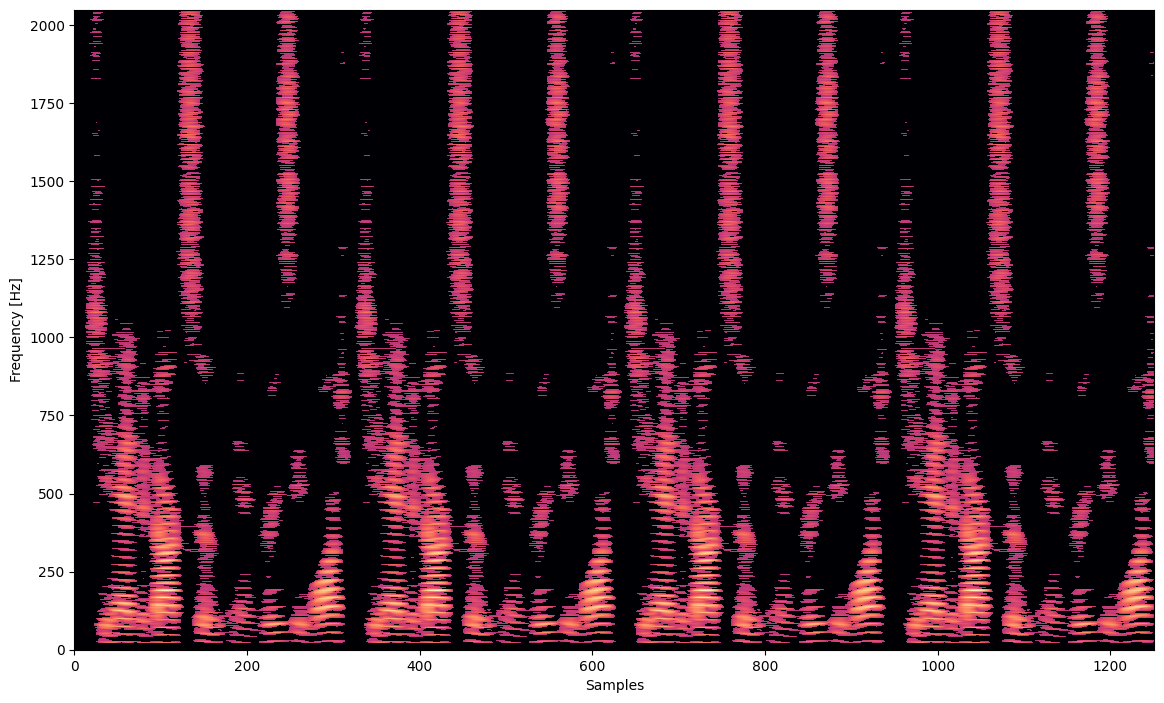

In [424]:
plot_spectrogram(specgram_data_filtered)

## Step 4 : Perform Inverse Fourier Transform

### Inverse fourier transform

In [425]:
output1 = librosa.core.istft(specgram_data_filtered, win_length=4096, hop_length=128)

## Step 5 : Extract Audio

In [426]:
def extract_audio(filename, audio, sampling_rate):
    sf.write(filename, audio, samplerate=sampling_rate)
    print("Extracted Successfully")

In [427]:
extract_audio('./output/output1.wav', output1, sampling_rate)

Extracted Successfully


### Plotting the result time domain representation

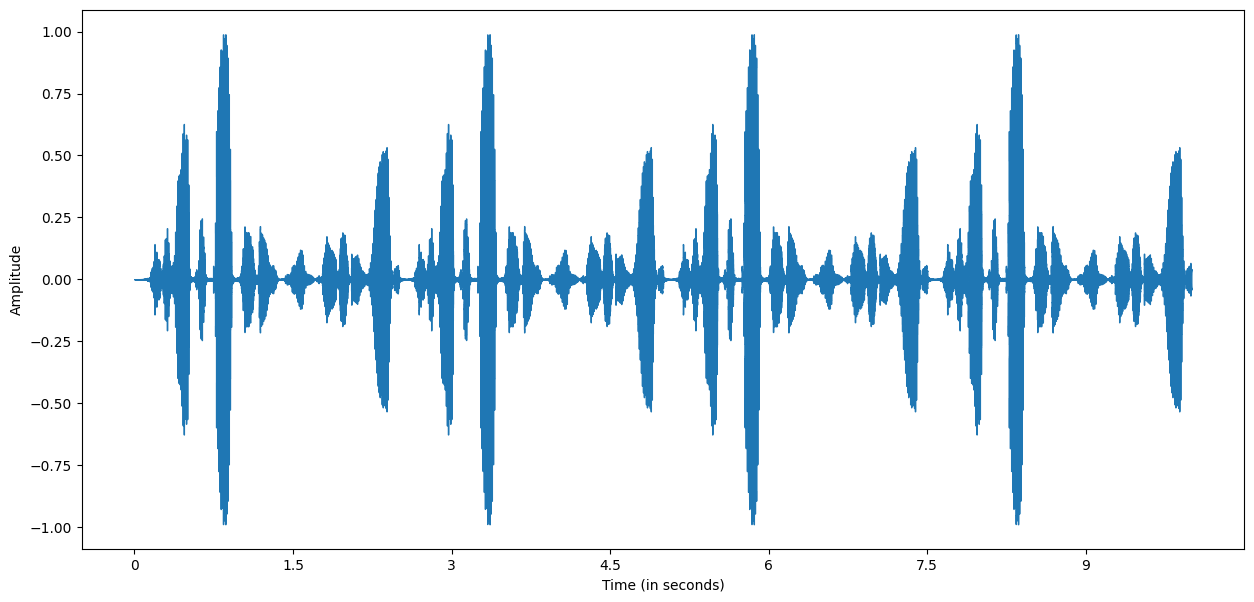

In [428]:
plot_waveshow_td_representation(output1, sampling_rate)

In [429]:
Audio('./output/output1.wav')